In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
from pylab import rcParams
import seaborn as sns
import scipy.stats
%matplotlib inline


import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


In [152]:
# import the 'Breast Cancer' dataset
df = pd.read_csv('C:\\Users\\SHUBHA\\Desktop\\Session-1-Introduction-To-Data-Analytics-Assignment\\Assignmnet 15\\Breast Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [153]:
#Checking for null values
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

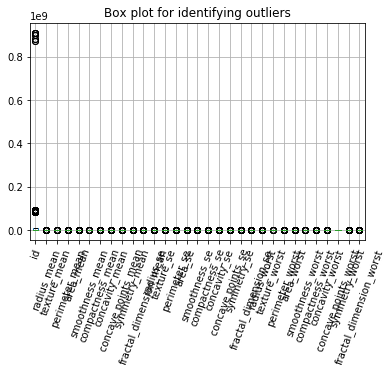

In [154]:
#Removing outliers 
df.boxplot(rot=70)
plt.title('Box plot for identifying outliers');

In [155]:
#Removing columns 'id' and 'diagnosis' 
#droping column id as it does not have any pattern.
filt_df = df.drop('id',axis=1)
filt_df = filt_df.loc[:,filt_df.columns != 'diagnosis']
filt_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [156]:
#Removing outliers
Q1 = filt_df.quantile(0.25)
Q3 = filt_df.quantile(0.75)
IQR = Q3 - Q1

filt_df = filt_df[~((filt_df < (Q1 - 1.5 * IQR)) |(filt_df > (Q3 + 1.5 * IQR))).any(axis=1)]
filt_df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


In [157]:
#Adding back columns id and column.
df_f= pd.concat([df.loc[:,'diagnosis'],filt_df], axis=1)
df_f.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
#Removing na values
bc=df_f.dropna()
print(bc.shape)
bc.head()

(398, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,M,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,M,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,M,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,M,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


In [159]:
#Importing modules
from sklearn.cluster import KMeans
from sklearn import datasets 


In [160]:
#Feature Extraction
X = bc.iloc[:, 1:].values
y = bc.iloc[:, 0].values
from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, y)

tree_clf.feature_importances_


array([0.02458402, 0.03051238, 0.05701141, 0.05747425, 0.00930194,
       0.02146059, 0.03420729, 0.10932477, 0.00771399, 0.00919276,
       0.05843102, 0.00958323, 0.01171531, 0.18347829, 0.00683777,
       0.0065137 , 0.00982526, 0.00935048, 0.0161096 , 0.00776795,
       0.03360263, 0.03615457, 0.0302527 , 0.08351955, 0.02199956,
       0.01631017, 0.0205597 , 0.04680637, 0.01061185, 0.01978691])

In [161]:
importances = tree_clf.feature_importances_
feature_names = bc.iloc[:, 1:].columns.tolist()
feature_names
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
feature_imp_dir

{'radius_mean': 0.02458401705425874,
 'texture_mean': 0.030512375370112033,
 'perimeter_mean': 0.05701140690300051,
 'area_mean': 0.05747424774382941,
 'smoothness_mean': 0.009301944404930087,
 'compactness_mean': 0.02146059049593528,
 'concavity_mean': 0.03420728729363505,
 'concave points_mean': 0.10932476681084606,
 'symmetry_mean': 0.00771399423687486,
 'fractal_dimension_mean': 0.009192756015715198,
 'radius_se': 0.058431018534585655,
 'texture_se': 0.009583229241112472,
 'perimeter_se': 0.011715308539911753,
 'area_se': 0.18347828762205307,
 'smoothness_se': 0.006837772344055133,
 'compactness_se': 0.006513696915116438,
 'concavity_se': 0.009825256101586561,
 'concave points_se': 0.009350481441604466,
 'symmetry_se': 0.016109602845294082,
 'fractal_dimension_se': 0.007767948329927639,
 'radius_worst': 0.033602634503482484,
 'texture_worst': 0.03615456576757612,
 'perimeter_worst': 0.030252695544005954,
 'area_worst': 0.08351954778110307,
 'smoothness_worst': 0.021999562062282145,

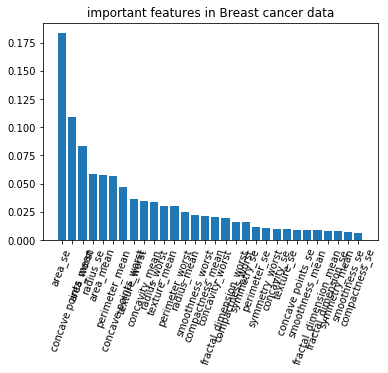

In [162]:
plt.xticks(rotation=70)
plt.bar(range(len(features)), [imp[1] for imp in features], align='center',tick_label = [imp[0] for imp in features])
plt.title('important features in Breast cancer data');

In [163]:
X = bc.iloc[:, 1:]
from sklearn.feature_selection import SelectFromModel
abc = SelectFromModel(tree_clf, prefit = True)
x_updated = abc.transform(X)
print('Total Features count:', np.array(X).shape[1])
print('Selected Features: ' ,np.array(x_updated).shape[1])
print('Selected Features: ', X.columns[abc.get_support()])

Total Features count: 30
Selected Features:  10
Selected Features:  Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'area_se', 'radius_worst', 'texture_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


In [164]:
X = bc[['radius_mean', 'texture_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'concavity_worst', 'concave points_worst']].values

bc['diagnosis'] = bc['diagnosis'].astype('category')
bc["diagnosis_cat"] = bc["diagnosis"].cat.codes
bc.head()

y = bc["diagnosis_cat"].values



C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [165]:
# Create 2 clusters for the dataset using KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)

In [166]:
# fit the model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [167]:
# view the data labels after clustering
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [168]:
# view the cluster centers
kmeans.cluster_centers_  #coordinate of centers

array([[1.70075000e+01, 2.08137500e+01, 1.26518250e-01, 7.35133750e-02,
        5.13406250e+01, 2.02158750e+01, 2.84181250e+01, 1.33705000e+02,
        3.77553750e-01, 1.60647000e-01],
       [1.24626761e+01, 1.79252830e+01, 4.38192821e-02, 2.64402925e-02,
        2.02670440e+01, 1.37974969e+01, 2.37934277e+01, 8.98192138e+01,
        1.72163324e-01, 8.01532736e-02]])

In [169]:
# visualise the KMeans clusters

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
# create a array for label colors
colors = ['blue', 'green']

In [172]:
# assign color to each cluster
pred_colors = [colors[label] for label in kmeans.labels_]

In [173]:
# assign color to existing labels
actual_colors = [colors[label] for label in y]

Text(0.5,1,'KMeans clusters')

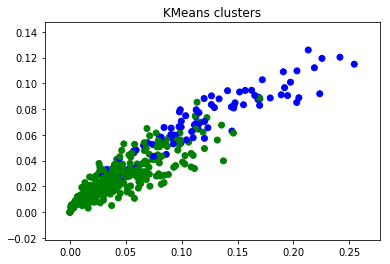

In [174]:

# plot the KMeans clusters
plt.scatter(X[:, 2], X[:, 3], c=pred_colors)
plt.title('KMeans clusters')

Text(0.5,1,'Existing Layout')

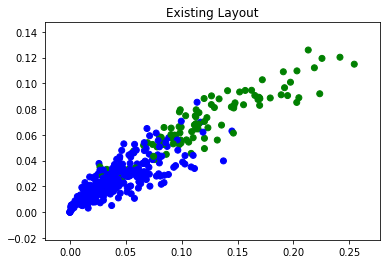

In [175]:
#Existing layout
plt.scatter(X[:, 2], X[:, 3], c=actual_colors)
plt.title('Existing Layout')

Text(0.5,1,'Existing Layout')

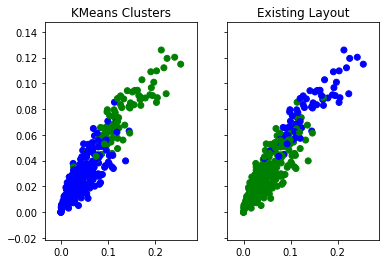

In [176]:
#Side-by-side visualization
# Two subplots
f, axarr = plt.subplots(1, 2, sharey=True)

axarr[0].scatter(X[:, 2], X[:, 3], c=actual_colors)
axarr[0].set_title('KMeans Clusters')

axarr[1].scatter(X[:, 2], X[:, 3], c=pred_colors)
axarr[1].set_title('Existing Layout')


In [177]:
# Create Hierarchicial clustering model using linkages : {“ward”, “complete”, “average”}

Text(0,0.5,'Euclidean distances')

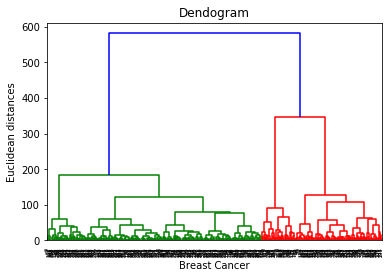

In [178]:
#Linkage:ward
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram = dendrogram(linkage(X, method = 'ward')) #ward - minimize variace in each 
plt.title('Dendogram')
plt.xlabel('Breast Cancer')
plt.ylabel('Euclidean distances')

Text(0,0.5,'Euclidean distances')

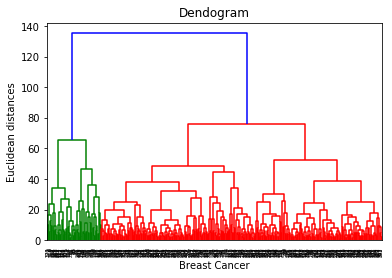

In [179]:
#Linkage:Complete
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram = dendrogram(linkage(X, method = 'complete'))  
plt.title('Dendogram')
plt.xlabel('Breast Cancer')
plt.ylabel('Euclidean distances')

Text(0,0.5,'Euclidean distances')

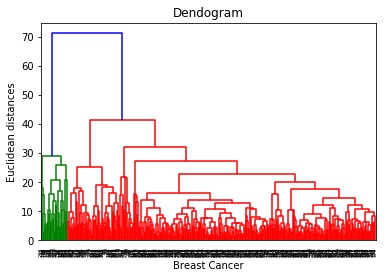

In [180]:
#Linkage:average
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram = dendrogram(linkage(X, method = 'average'))  
plt.title('Dendogram')
plt.xlabel('Breast Cancer')
plt.ylabel('Euclidean distances')

In [181]:
# visualise the clusters

In [182]:
#Linkage:ward
# import the module
from sklearn.cluster import AgglomerativeClustering

# create an instance
n_clusters = 2
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# fit the model
ward.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x0000025877326840>)

In [183]:
# assign colors to each cluster
colors = c=np.random.rand(n_clusters, 3)

pred_colors_3 = [colors[label] for label in ward.labels_]

Text(0.5,1,'Hierarchical clustering')

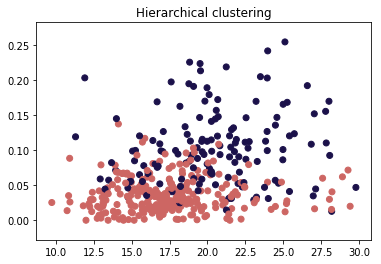

In [184]:
#Hierarchical clusters
plt.scatter(X[:, 1], X[:, 2], c=pred_colors_3)
plt.title('Hierarchical clustering')

In [185]:
#Linkage:complete
# import the module
from sklearn.cluster import AgglomerativeClustering

# create an instance
n_clusters = 2
complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')

# fit the model
complete.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=2,
            pooling_func=<function mean at 0x0000025877326840>)

In [186]:
# assign colors to each cluster
colors = c=np.random.rand(n_clusters, 3)

pred_colors_3 = [colors[label] for label in complete.labels_]

Text(0.5,1,'Hierarchical clustering')

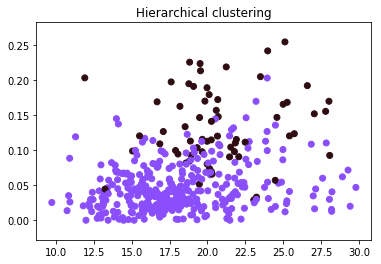

In [187]:
#Hierarchical clusters
plt.scatter(X[:, 1], X[:, 2], c=pred_colors_3)
plt.title('Hierarchical clustering')

In [188]:
#Linkage:average
# import the module
from sklearn.cluster import AgglomerativeClustering

# create an instance
n_clusters = 2
average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')

# fit the model
average.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=2,
            pooling_func=<function mean at 0x0000025877326840>)

In [189]:
# assign colors to each cluster
colors = c=np.random.rand(n_clusters, 3)

pred_colors_3 = [colors[label] for label in average.labels_]

Text(0.5,1,'Hierarchical clustering')

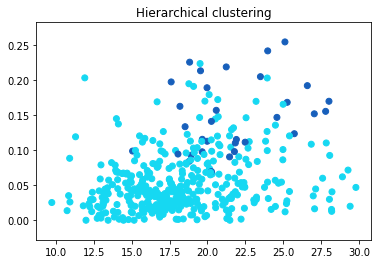

In [190]:
#Hierarchical clusters
plt.scatter(X[:, 1], X[:, 2], c=pred_colors_3)
plt.title('Hierarchical clustering')

In [101]:
# Compare the results

In [191]:
#Confusion Matrix
y_pred = kmeans.labels_.tolist()
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)
list1 = ["Actual 0", "Actual 1"]
list2 = ["Predicted 0", "Predicted 1"]
pd.DataFrame(confusion_matrix, list1,list2)

[[  6 294]
 [ 74  24]]


,Predicted 0,Predicted 1
Actual 0,6,294
Actual 1,74,24


In [192]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y,y_pred)
print("K means accuracy:",accuracy)

K means accuracy: 0.07537688442211055


In [194]:
#Comparing actual and predicted labels for kmeans clustering.
# select 20 records
labels = kmeans.labels_.tolist()
predlabels = labels[:10]+ labels[-10:]
actual_label = bc.head(10).diagnosis_cat.tolist() + bc.tail(10).diagnosis_cat.tolist()
data = bc.head(10).diagnosis.tolist() + bc.tail(10).diagnosis.tolist()


In [195]:
# print actual vs predicted
i = 0
for sms, label in zip(predlabels, actual_label):
    print("Diagnosis:",str(data[i]) +" ("+ "actual label", str(actual_label[i]) +") => "+ "Kmeans pred:",str(predlabels[i]))
    i += 1

Diagnosis: M (actual label 1) => Kmeans pred: 0
Diagnosis: M (actual label 1) => Kmeans pred: 0
Diagnosis: M (actual label 1) => Kmeans pred: 0
Diagnosis: M (actual label 1) => Kmeans pred: 0
Diagnosis: M (actual label 1) => Kmeans pred: 0
Diagnosis: M (actual label 1) => Kmeans pred: 0
Diagnosis: M (actual label 1) => Kmeans pred: 0
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: B (actual label 0) => Kmeans pred: 1
Diagnosis: M (actual label 1) => Kmeans pred: 0


In [196]:
#Confusion Matrix for linkage ward
ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
ward.fit(X)
y_pred = ward.labels_.tolist()
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)
list1 = ["Actual 0", "Actual 1"]
list2 = ["Predicted 0", "Predicted 1"]
pd.DataFrame(confusion_matrix, list1,list2)

[[ 46 254]
 [ 97   1]]


,Predicted 0,Predicted 1
Actual 0,46,254
Actual 1,97,1


In [197]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y,y_pred)
print("Hierarchical clustering accuracy for linkage ward :",accuracy)

Hierarchical clustering accuracy for linkage ward : 0.11809045226130653


In [198]:
#Confusion Matrix for linkage average
average = AgglomerativeClustering(n_clusters=2, linkage='average')
average.fit(X)
y_pred = average.labels_.tolist()
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)
list1 = ["Actual 0", "Actual 1"]
list2 = ["Predicted 0", "Predicted 1"]
pd.DataFrame(confusion_matrix, list1,list2)

[[300   0]
 [ 66  32]]


,Predicted 0,Predicted 1
Actual 0,300,0
Actual 1,66,32


In [199]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y,y_pred)
print("Hierarchical clustering accuracy for linkage average :",accuracy)

Hierarchical clustering accuracy for linkage average : 0.8341708542713567


In [200]:
#Confusion Matrix for linkage complete
complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
complete.fit(X)
y_pred = complete.labels_.tolist()
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)
list1 = ["Actual 0", "Actual 1"]
list2 = ["Predicted 0", "Predicted 1"]
pd.DataFrame(confusion_matrix, list1,list2)

[[298   2]
 [ 36  62]]


,Predicted 0,Predicted 1
Actual 0,298,2
Actual 1,36,62


In [201]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y,y_pred)
print("Hierarchical clustering accuracy for linkage complete :",accuracy)

Hierarchical clustering accuracy for linkage complete : 0.9045226130653267


In [202]:
#Comparing actual and predicted labels for Hierarchical clustering.
# select 20 records
labels = complete.labels_.tolist()
predlabels = labels[:10]+ labels[-10:]
actual_label = bc.head(10).diagnosis_cat.tolist() + bc.tail(10).diagnosis_cat.tolist()
data = bc.head(10).diagnosis.tolist() + bc.tail(10).diagnosis.tolist()


In [203]:
# print actual vs predicted
i = 0
for sms, label in zip(predlabels, actual_label):
    print("Diagnosis:",str(data[i]) +" ("+ "actual label", str(actual_label[i]) +") => "+ "Hierarchical pred:",str(predlabels[i]))
    i += 1

Diagnosis: M (actual label 1) => Hierarchical pred: 1
Diagnosis: M (actual label 1) => Hierarchical pred: 0
Diagnosis: M (actual label 1) => Hierarchical pred: 1
Diagnosis: M (actual label 1) => Hierarchical pred: 1
Diagnosis: M (actual label 1) => Hierarchical pred: 0
Diagnosis: M (actual label 1) => Hierarchical pred: 1
Diagnosis: M (actual label 1) => Hierarchical pred: 1
Diagnosis: B (actual label 0) => Hierarchical pred: 0
Diagnosis: B (actual label 0) => Hierarchical pred: 0
Diagnosis: B (actual label 0) => Hierarchical pred: 0
Diagnosis: B (actual label 0) => Hierarchical pred: 0
Diagnosis: B (actual label 0) => Hierarchical pred: 0
Diagnosis: B (actual label 0) => Hierarchical pred: 0
Diagnosis: B (actual label 0) => Hierarchical pred: 0
Diagnosis: B (actual label 0) => Hierarchical pred: 0
Diagnosis: B (actual label 0) => Hierarchical pred: 0
Diagnosis: B (actual label 0) => Hierarchical pred: 0
Diagnosis: B (actual label 0) => Hierarchical pred: 0
Diagnosis: B (actual label 0

In [ ]:
#Hierarchical clustering accuracy of linkage 'complete' is better with score 0.904